## Life cycle of machine Learning.
### 1.understanding the problem
### 2.data collection
### 3.data checks to performs 
### 4.EDA
### 5.data pre-processing 
### 6.Model training 
### 7.chose best Model

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [91]:
df = pd.read_csv('E:\\ML-Project\\notebook\\data\\stud.csv')

In [92]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [93]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [94]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [96]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [97]:
# Exploring Data

In [98]:
print("Categories in 'gender' variable:",end=" ")
print('/n')
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:",end=" ")
print('/n')
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:",end=" ")
print('/n')
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:",end=" ")
print('/n')
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:",end=" ")
print('/n')
print(df['test_preparation_course'].unique())



Categories in 'gender' variable: /n
['female' 'male']
Categories in 'race_ethnicity' variable: /n
['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable: /n
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: /n
['standard' 'free/reduced']
Categories in 'test_preparation_course' variable: /n
['none' 'completed']


In [99]:
# to check weather data is Numericals or Categoricals..
numerical_data = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_data = [feature for feature in df.columns if df[feature].dtype == 'O'] 

print('we have {} numericals features {}'.format(len(numerical_data),numerical_data))
print('we have {} categorical features {}'.format(len(categorical_data),categorical_data))



we have 3 numericals features ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [100]:
len(numerical_data)

3

In [101]:
# create Total Score and Average Score
df['Total_Score'] = df['math_score']+df['reading_score']+df['writing_score']
df['Average_score'] = df['Total_Score']/3


In [102]:
df['Total_Score']
df['Average_score']

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Average_score, Length: 1000, dtype: float64

In [103]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [104]:
reading_full =df[df['reading_score']==100]['Average_score'].count()
writing_full =df[df['writing_score']==100]['Average_score'].count()
Math_full =df[df['math_score']==100]['Average_score'].count()


print('number of students with full marks in writing: {}'.format(writing_full))
print('number of students with full marks in reading: {}'.format(reading_full))
print('number of students with full marks in mathematics: {}'.format(Math_full))


number of students with full marks in writing: 14
number of students with full marks in reading: 17
number of students with full marks in mathematics: 7


In [105]:
reading_less20 =df[df['reading_score']<=20]['Average_score'].count()
writing_less20 =df[df['writing_score']<=20]['Average_score'].count()
Math_less20 =df[df['math_score']<=20]['Average_score'].count()

print('number of students with less then 20 marks in writing: {}'.format(writing_less20))
print('number of students with less then 20 marks in reading: {}'.format(reading_less20))
print('number of students with less then 20 marks in mathematics: {}'.format(Math_less20))

number of students with less then 20 marks in writing: 3
number of students with less then 20 marks in reading: 1
number of students with less then 20 marks in mathematics: 4


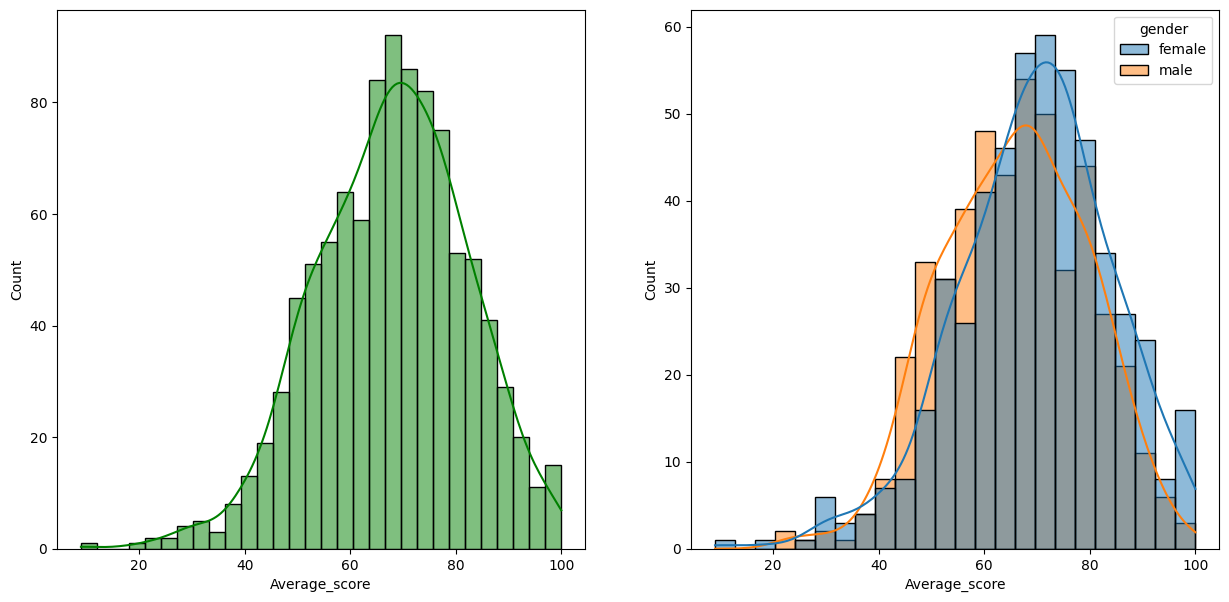

In [106]:
fig,axs=plt.subplots(1,2,figsize=(15, 7))
plt.subplot(121) 
sns.histplot(data=df,x='Average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average_score',kde=True,hue='gender')
plt.show()


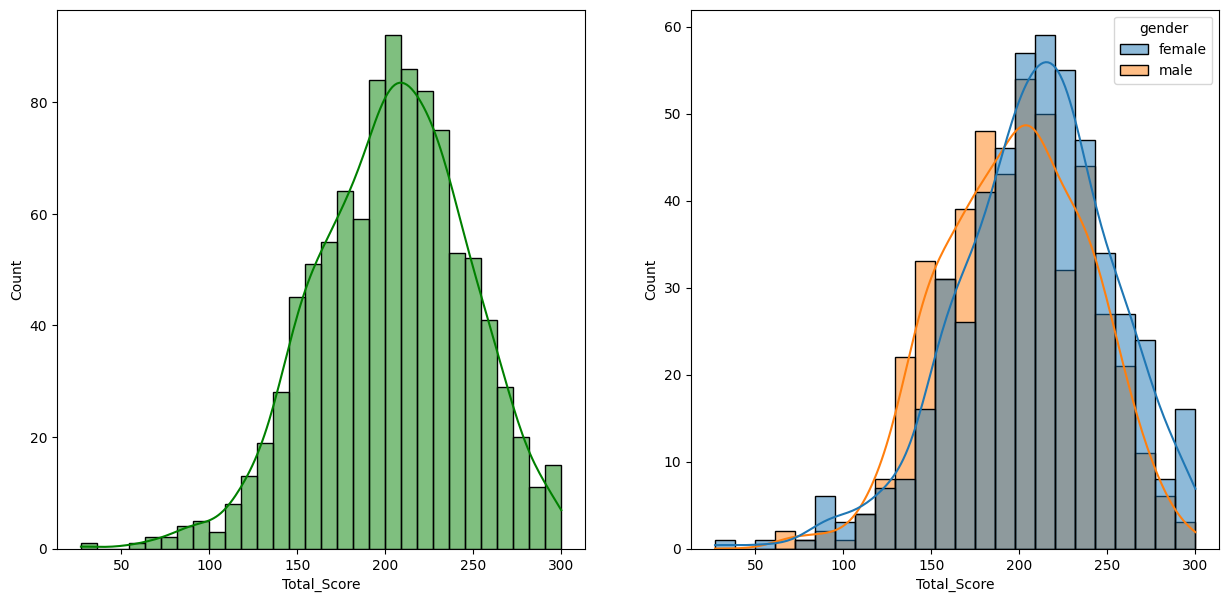

In [107]:
fig,axs=plt.subplots(1,2,figsize=(15, 7))
plt.subplot(121) 
sns.histplot(data=df,x='Total_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_Score',kde=True,hue='gender')
plt.show()


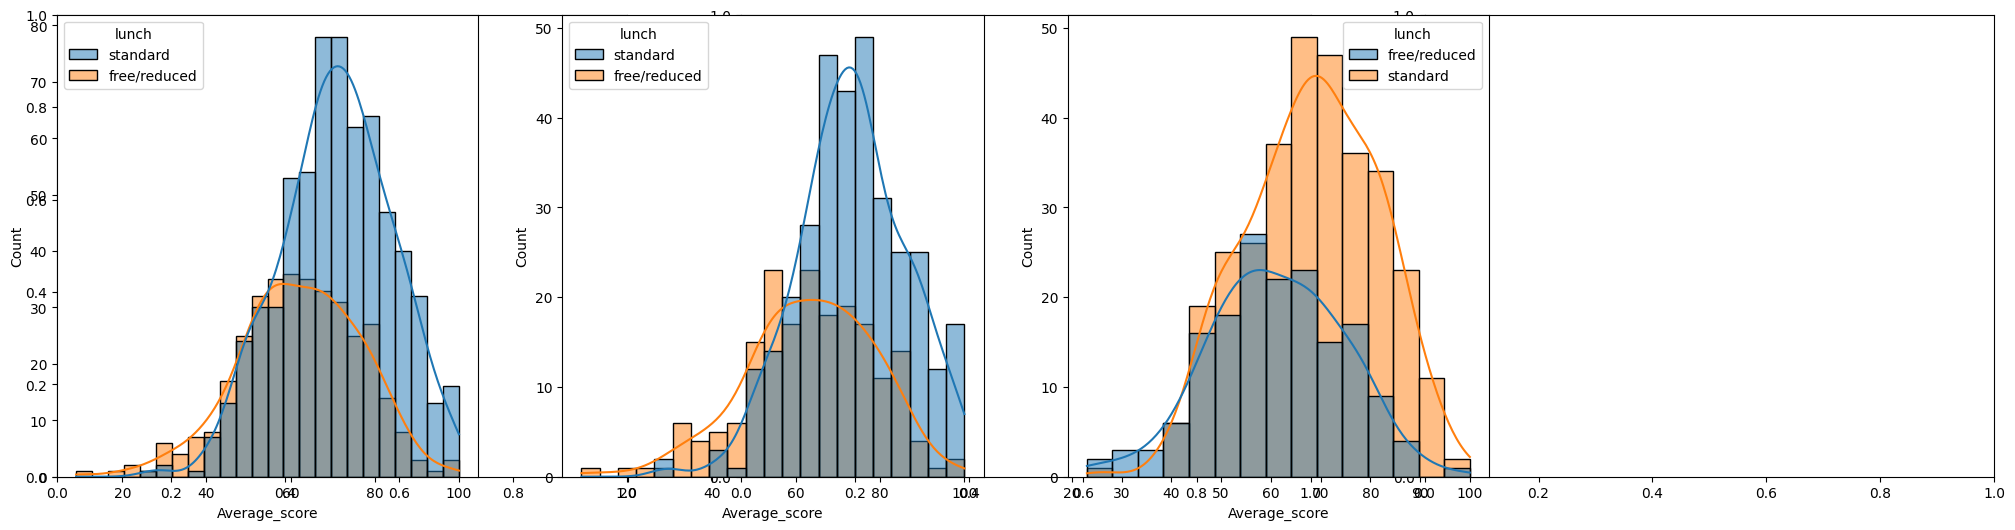

In [109]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='lunch')
plt.show()